In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from wrangle import wrangle_zillow
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = wrangle_zillow()

In [3]:
df.head(3)

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,...,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
0,1727539,14297519,3.5,4.0,6059.0,33634931.0,-117869207.0,4506.0,122,261.0,...,2017-01-01,Single Family Residential,Orange County,19.0,0.133,0.103444,0.1,0,1,0
1,1387261,17052889,1.0,2.0,6111.0,34449266.0,-119281531.0,12647.0,1110,261.0,...,2017-01-01,Single Family Residential,Ventura County,50.0,0.333,0.290335,0.3,0,0,1
2,11677,14186244,2.0,3.0,6059.0,33886168.0,-117823170.0,8432.0,122,261.0,...,2017-01-01,Single Family Residential,Orange County,55.0,0.400,0.193572,0.2,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52030 entries, 0 to 52029
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         52030 non-null  int64  
 1   parcelid                   52030 non-null  int64  
 2   bathroomcnt                52030 non-null  float64
 3   bedroomcnt                 52030 non-null  float64
 4   fips                       52030 non-null  float64
 5   latitude                   52030 non-null  float64
 6   longitude                  52030 non-null  float64
 7   lotsizesquarefeet          52030 non-null  float64
 8   propertycountylandusecode  52030 non-null  object 
 9   propertylandusetypeid      52030 non-null  float64
 10  rawcensustractandblock     52030 non-null  float64
 11  roomcnt                    52030 non-null  float64
 12  yearbuilt                  52030 non-null  float64
 13  taxvaluedollarcnt          52030 non-null  flo

In [5]:

def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df.fips)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.fips)

    return train, validate, test

In [6]:
train, validate, test = train_validate_test_split(df)


train.shape, validate.shape, test.shape

((29136, 26), (12488, 26), (10406, 26))

In [7]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,...,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
34264,2036202,12529787,4.0,4.0,6037.0,33770665.0,-118120850.0,6570.0,0101,261.0,...,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0
8237,2883002,11848044,2.0,2.0,6037.0,34047118.0,-118135592.0,11051.0,0101,261.0,...,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0
31640,2759592,17271234,2.0,3.0,6111.0,34168614.0,-118954733.0,15259.0,1111,261.0,...,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1
14309,1044874,17266806,2.0,3.0,6111.0,34167209.0,-118938046.0,7422.0,1111,261.0,...,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1
50710,2848400,17068575,4.0,3.0,6111.0,34359245.0,-119312477.0,162914.0,1110,261.0,...,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1


In [ ]:
df.info()

Variance of logerror for Los Angeles County.
0.02740415350675282
Variance of logerror for Orange County.
0.038419850345884216
Variance of logerror for Ventura County.
0.024150919610820307


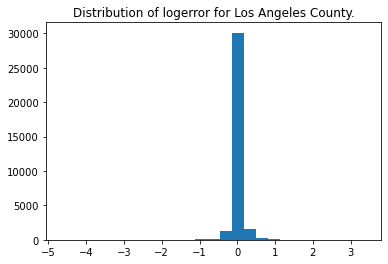

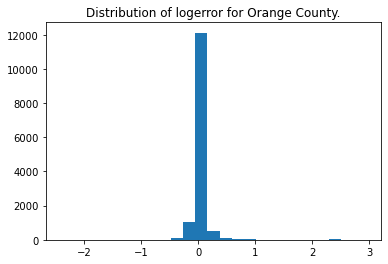

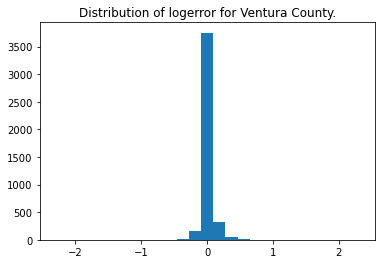

In [8]:
#Loop through my counties and plot the distribution of the target variable
county_list = ['Los Angeles County', 'Orange County', 'Ventura County']

for County in county_list:
    print('Variance of logerror for {}.'.format(County))
    print(df[df['County'] == County].logerror.var())
    
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(County))
    plt.hist(df[df['County'] == County].logerror, bins=25)

<AxesSubplot:xlabel='County', ylabel='logerror'>

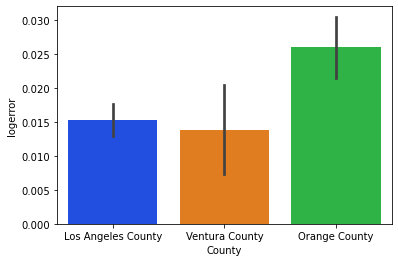

In [9]:
#Compare the average log error between counties
sns.barplot(x='County', y='logerror', data=train, palette= "bright")

## Question 1 - Is log error significantly different for properties in the three counties?

Null hypothesis: Log error will be the same across all three counties.
Alternative hypothesis: Log error will vary based on county.

In [10]:
#Conduct an ANOVA test between the counties
f_county, p_county = stats.f_oneway(df[df['County'] == 'Los Angeles County'].logerror,
                                    df[df['County'] == 'Orange County'].logerror,
                                    df[df['County'] == 'Ventura County'].logerror)

f_county, p_county

(22.500550909641934, 1.7074916354433785e-10)

In [11]:
#Compare my p value to alpha
alpha = 0.05
if p_county < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


## Question 2 - Is log error significantly different for properties that have diffrent bathroom counts 

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

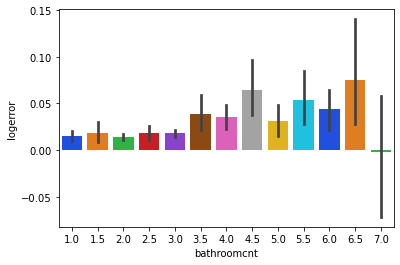

In [12]:
sns.barplot(x='bathroomcnt', y='logerror', data=train, palette= "bright")

## Question 3 - Is log error significantly different for properties that have diffrent bedroom counts

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

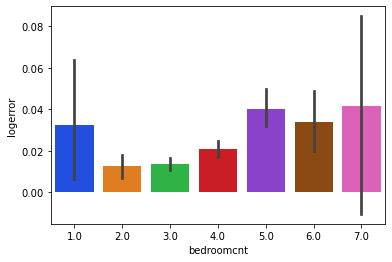

In [13]:
sns.barplot(x='bedroomcnt', y='logerror', data=train, palette= "bright")

## Question 4 -  Is log error significantly different for properties that have diffrent tax values

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

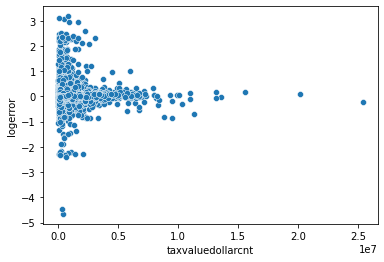

In [14]:
sns.scatterplot(x='taxvaluedollarcnt', y='logerror', data=train, palette= "bright")

Null hypothesis: There is no correlation between price and log error.
Alternative hypothesis: There is a relationship between price and log error.

In [15]:
#Test for correlation between the two
corr_value, p_value = stats.pearsonr(df['taxvaluedollarcnt'],
                                     df['logerror'])

corr_value, p_value

(-0.006149787116911295, 0.16069102565002474)

In [16]:
#Test my hypothesis
if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


## Scalign the data

In [17]:
pd.set_option('display.max_columns', None)
train.head()


,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
34264,2036202,12529787,4.0,4.0,6037.0,33770665.0,-118120850.0,6570.0,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0
8237,2883002,11848044,2.0,2.0,6037.0,34047118.0,-118135592.0,11051.0,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0
31640,2759592,17271234,2.0,3.0,6111.0,34168614.0,-118954733.0,15259.0,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1
14309,1044874,17266806,2.0,3.0,6111.0,34167209.0,-118938046.0,7422.0,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1
50710,2848400,17068575,4.0,3.0,6111.0,34359245.0,-119312477.0,162914.0,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1


Scaing for thr fisrt cluster 

In [20]:
#Import dependencies
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet','longitude','latitude' ]
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [21]:
scale_data(train, validate, test)

(            id  parcelid  bathroomcnt  bedroomcnt    fips  latitude  \
 34264  2036202  12529787     0.500000    0.500000  6037.0  0.290645   
 8237   2883002  11848044     0.166667    0.166667  6037.0  0.477749   
 31640  2759592  17271234     0.166667    0.333333  6111.0  0.559977   
 14309  1044874  17266806     0.166667    0.333333  6111.0  0.559026   
 50710  2848400  17068575     0.500000    0.333333  6111.0  0.688996   
 ...        ...       ...          ...         ...     ...       ...   
 36183   495424  11265245     0.000000    0.333333  6037.0  0.889919   
 51886  1479618  11203739     0.166667    0.333333  6037.0  0.828910   
 31438   823642  11278023     0.166667    0.333333  6037.0  0.920220   
 44652  1370884  17237594     0.250000    0.500000  6111.0  0.635558   
 26694  1921689  14413762     0.250000    0.333333  6059.0  0.126949   
 
        longitude  lotsizesquarefeet propertycountylandusecode  \
 34264   0.705217           0.008265                      0101   
 8

In [22]:
#Test my function
train_s, valid_s, test_s = scale_data(train, validate, test)

In [23]:
#See if the results make sense
train_s.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura
34264,2036202,12529787,0.500000,0.500000,6037.0,0.290645,0.705217,0.008265,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0
8237,2883002,11848044,0.166667,0.166667,6037.0,0.477749,0.697542,0.014113,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0
31640,2759592,17271234,0.166667,0.333333,6111.0,0.559977,0.271079,0.019604,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1
14309,1044874,17266806,0.166667,0.333333,6111.0,0.559026,0.279767,0.009377,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1
50710,2848400,17068575,0.500000,0.333333,6111.0,0.688996,0.084830,0.212281,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1


## Clustering 

###  first cluster - size= bed bath, sqft 

In [24]:
X = train_s[['bathroomcnt', 'bedroomcnt','lotsizesquarefeet']]
X.head()

,bathroomcnt,bedroomcnt,lotsizesquarefeet
34264,0.500000,0.500000,0.008265
8237,0.166667,0.166667,0.014113
31640,0.166667,0.333333,0.019604
14309,0.166667,0.333333,0.009377
50710,0.500000,0.333333,0.212281


In [25]:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(X)

clusters = kmeans1.predict(X)
clusters

array([3, 1, 2, ..., 2, 0, 2], dtype=int32)

In [26]:
train_s['size_cluster'] = clusters
train_s.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura,size_cluster
34264,2036202,12529787,0.500000,0.500000,6037.0,0.290645,0.705217,0.008265,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0,3
8237,2883002,11848044,0.166667,0.166667,6037.0,0.477749,0.697542,0.014113,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0,1
31640,2759592,17271234,0.166667,0.333333,6111.0,0.559977,0.271079,0.019604,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1,2
14309,1044874,17266806,0.166667,0.333333,6111.0,0.559026,0.279767,0.009377,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1,2
50710,2848400,17068575,0.500000,0.333333,6111.0,0.688996,0.084830,0.212281,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1,3


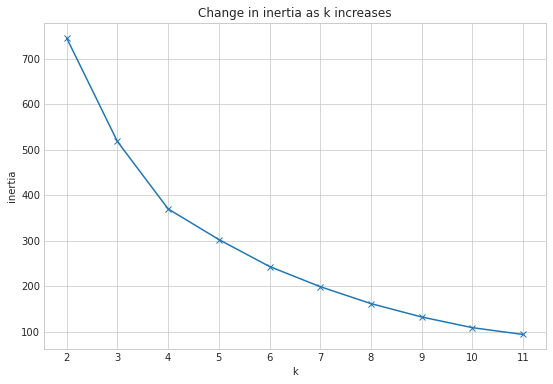

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### second cluster - locations- log lat 

In [28]:
L = train_s[['latitude', 'longitude']]
L.head()

,latitude,longitude
34264,0.290645,0.705217
8237,0.477749,0.697542
31640,0.559977,0.271079
14309,0.559026,0.279767
50710,0.688996,0.084830


In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(L)

clusters = kmeans.predict(L)
clusters

array([3, 3, 2, ..., 1, 2, 0], dtype=int32)

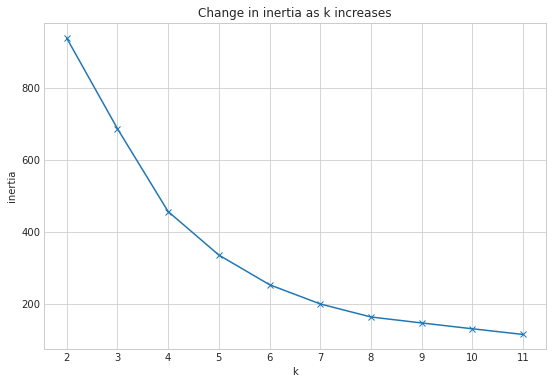

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(L).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [33]:
train_s['location_cluster'] = clusters
train_s.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura,size_cluster,location_cluster
34264,2036202,12529787,0.500000,0.500000,6037.0,0.290645,0.705217,0.008265,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0,3,3
8237,2883002,11848044,0.166667,0.166667,6037.0,0.477749,0.697542,0.014113,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0,1,3
31640,2759592,17271234,0.166667,0.333333,6111.0,0.559977,0.271079,0.019604,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1,2,2
14309,1044874,17266806,0.166667,0.333333,6111.0,0.559026,0.279767,0.009377,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1,2,2
50710,2848400,17068575,0.500000,0.333333,6111.0,0.688996,0.084830,0.212281,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1,3,2


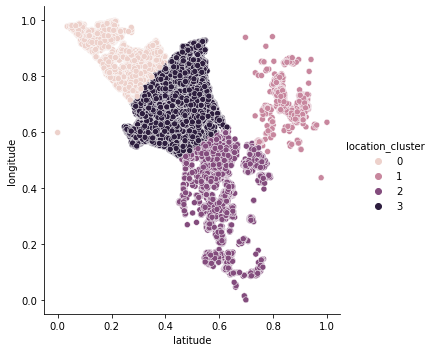

In [34]:
sns.relplot(data=train_s, x='latitude', y='longitude', hue='location_cluster')

In [35]:
kmeans.cluster_centers_


array([[0.23975942, 0.86525604],
       [0.86694153, 0.70033361],
       [0.60694037, 0.41559204],
       [0.43805039, 0.68967989]])

In [36]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=L.columns)
centroids


,latitude,longitude
0,0.239759,0.865256
1,0.866942,0.700334
2,0.606940,0.415592
3,0.438050,0.689680


Text(0.5, 1.0, 'Visualizing Cluster Centers')

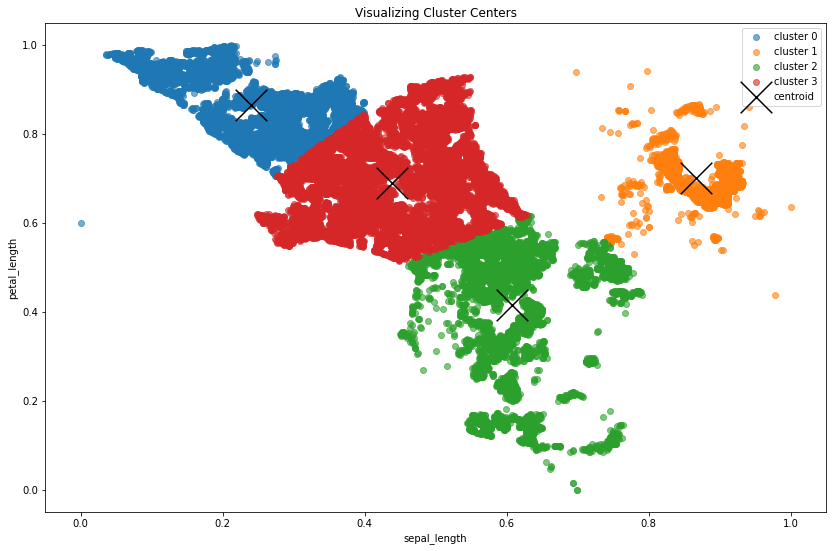

In [78]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_s.groupby('location_cluster'):
    plt.scatter(subset.latitude, subset.longitude, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='longitude', x='latitude', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')


plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')



## third custer -size and age cluster -  age  and lotsize 

In [38]:
A = train_s[['lotsizesquarefeet', 'age']]
A.head()

,lotsizesquarefeet,age
34264,0.008265,52.0
8237,0.014113,65.0
31640,0.019604,33.0
14309,0.009377,46.0
50710,0.212281,28.0


In [106]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(A)

clusters = kmeans2.predict(A)
clusters

array([2, 1, 0, ..., 1, 0, 0], dtype=int32)

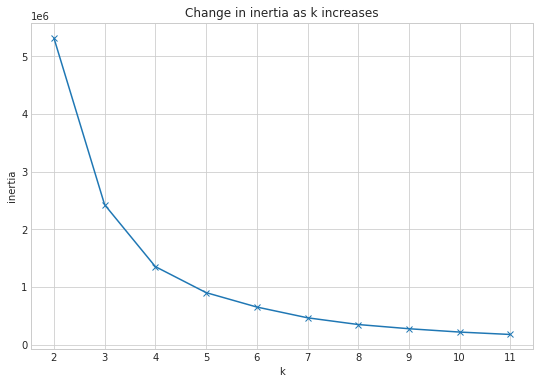

In [107]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(A).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [41]:
train_s['age_size'] = clusters
train_s.head()

,id,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror,transactiondate,propertylandusedesc,County,age,age_bin,acres,acres_bin,LA,Orange,Ventura,size_cluster,location_cluster,age_size
34264,2036202,12529787,0.500000,0.500000,6037.0,0.290645,0.705217,0.008265,0101,261.0,6.037578e+07,0.0,1965.0,963045.0,2016.0,-0.005355,2017-06-27,Single Family Residential,Los Angeles County,52.0,0.400,0.150826,0.2,1,0,0,3,3,2
8237,2883002,11848044,0.166667,0.166667,6037.0,0.477749,0.697542,0.014113,0101,261.0,6.037482e+07,0.0,1952.0,299104.0,2016.0,0.041482,2017-02-24,Single Family Residential,Los Angeles County,65.0,0.466,0.253696,0.3,1,0,0,1,3,0
31640,2759592,17271234,0.166667,0.333333,6111.0,0.559977,0.271079,0.019604,1111,261.0,6.111006e+07,6.0,1984.0,263015.0,2016.0,0.072371,2017-06-16,Single Family Residential,Ventura County,33.0,0.266,0.350298,0.3,0,0,1,2,2,1
14309,1044874,17266806,0.166667,0.333333,6111.0,0.559026,0.279767,0.009377,1111,261.0,6.111006e+07,6.0,1971.0,548830.0,2016.0,-0.019596,2017-03-30,Single Family Residential,Ventura County,46.0,0.333,0.170386,0.2,0,0,1,2,2,2
50710,2848400,17068575,0.500000,0.333333,6111.0,0.688996,0.084830,0.212281,1110,261.0,6.111001e+07,7.0,1989.0,877934.0,2016.0,0.056052,2017-09-12,Single Family Residential,Ventura County,28.0,0.200,3.739991,0.5,0,0,1,3,2,1


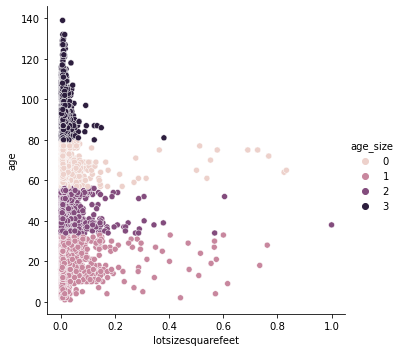

In [108]:
sns.relplot(data=train_s, x='lotsizesquarefeet', y='age', hue='age_size')

In [109]:
kmeans2.cluster_centers_


array([[1.60035188e-02, 2.11845292e+01],
       [1.15769239e-02, 6.54851687e+01],
       [1.24997980e-02, 4.72437579e+01],
       [9.13957851e-03, 9.33958084e+01]])

In [110]:
centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=A.columns)
centroids2

,lotsizesquarefeet,age
0,0.016004,21.184529
1,0.011577,65.485169
2,0.012500,47.243758
3,0.009140,93.395808


Text(0.5, 1.0, 'Visualizing Cluster Centers')

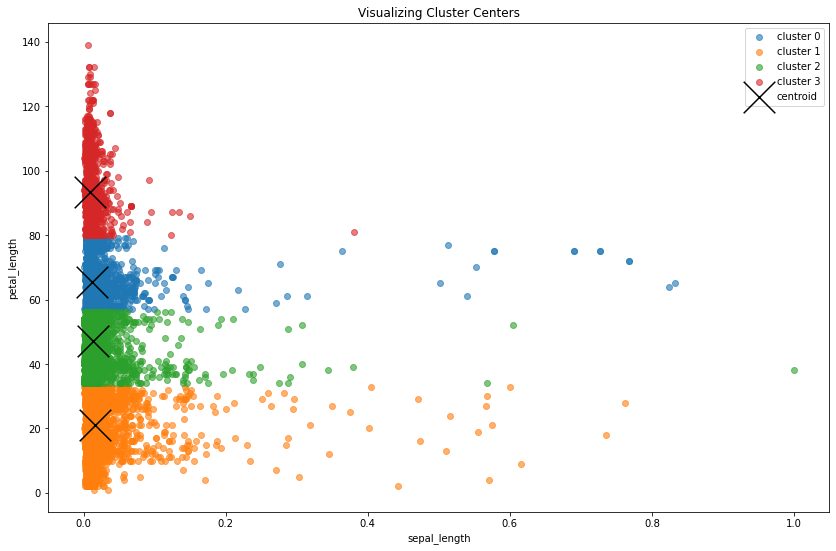

In [113]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_s.groupby('age_size'):
    plt.scatter(subset.lotsizesquarefeet, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids2.plot.scatter(y='age', x='lotsizesquarefeet', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')


plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

## Using select k best to find the best fetures for modeling 

In [84]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [91]:
X_train = train_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age','acres','LA','Orange','Ventura']]
y_train = pd.DataFrame(train[['logerror']])


X_validate = valid_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age','acres','LA','Orange','Ventura']]
y_validate = pd.DataFrame(validate[['logerror']])


X_test = test_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age','acres','LA','Orange','Ventura']]
y_test = pd.DataFrame(test[['logerror']])

In [92]:
kbest = SelectKBest(f_regression, k=6)
kbest.fit(X_train, y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x14ca18670>)

In [93]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
kbest_results

,p,f
bathroomcnt,5.195997e-09,34.135166
bedroomcnt,2.730687e-08,30.906959
latitude,9.085502e-05,15.322118
longitude,6.072144e-05,16.084730
lotsizesquarefeet,1.800570e-01,1.797240
age,1.547987e-03,10.022500
acres,1.800570e-01,1.797240
LA,3.367811e-04,12.856932
Orange,3.788513e-06,21.377186
Ventura,2.216195e-01,1.493918


In [94]:
X_train.columns[kbest.get_support()]

Index(['bathroomcnt', 'bedroomcnt', 'latitude', 'longitude', 'LA', 'Orange'], dtype='object')

In [95]:
from sklearn.linear_model import LinearRegression

In [100]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [101]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.columns)

,rfe_ranking
bathroomcnt,1
bedroomcnt,1
latitude,1
longitude,1
lotsizesquarefeet,3
age,4
acres,1
LA,2
Orange,5
Ventura,1


In [102]:
X_train.columns[rfe.get_support()]

Index(['bathroomcnt', 'bedroomcnt', 'latitude', 'longitude', 'acres',
       'Ventura'],
      dtype='object')

## MODELING

In [62]:
X_train = train_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age']]
y_train = pd.DataFrame(train[['logerror']])


X_validate = valid_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age']]
y_validate = pd.DataFrame(validate[['logerror']])


X_test = test_s[['bathroomcnt','bedroomcnt','latitude', 'longitude','lotsizesquarefeet', 'age']]
y_test = pd.DataFrame(test[['logerror']])

In [63]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#Establish baselines for the train and validation subsets
baseline = train.logerror.mean()

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.logerror, train.baseline))
valid_rmse = sqrt(mean_squared_error(validate.logerror, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 0.17902282261997393.
Validation baseline RMSE: 0.16293244362415202.


OLS

In [64]:
y_train.head()

,logerror
34264,-0.005355
8237,0.041482
31640,0.072371
14309,-0.019596
50710,0.056052


In [65]:
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12488 entries, 48846 to 23096
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroomcnt        12488 non-null  float64
 1   bedroomcnt         12488 non-null  float64
 2   latitude           12488 non-null  float64
 3   longitude          12488 non-null  float64
 4   lotsizesquarefeet  12488 non-null  float64
 5   age                12488 non-null  float64
dtypes: float64(6)
memory usage: 682.9 KB


In [66]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train['logerror'])

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['logerror'], y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['logerror'], y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17883554900185714 
Validation/Out-of-Sample:  0.16271189227865576


Lasso Lars

In [70]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train['logerror'])

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['logerror'], y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['logerror'], y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17902282261997393 
Validation/Out-of-Sample:  0.16293244362415202


In [ ]:
GLM

In [79]:
# # create the model object
# glm = TweedieRegressor(power=1, alpha=0)

# # fit the model to our training data. We must specify the column in y_train, 
# # since we have converted it to a dataframe from a series! 
# glm.fit(X_train, y_train['logerror'])

# # predict train
# y_train['logerror_pred_glm'] = glm.predict(X_train)

# # evaluate: rmse
# rmse_train = mean_squared_error(y_train['logerror'], y_train.logerror_pred_glm)**(1/2)

# # predict validate
# y_validate['logerror_pred_glm'] = glm.predict(X_validate)

# # evaluate: rmse
# rmse_validate = mean_squared_error(y_validate['logerror'], y_validate.logerror_pred_glm)**(1/2)

# print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
#       "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
PLoy

In [72]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [74]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train['logerror'])

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['logerror'], y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate['logerror'], y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.1786267667049568 
Validation/Out-of-Sample:  0.16273543880641334


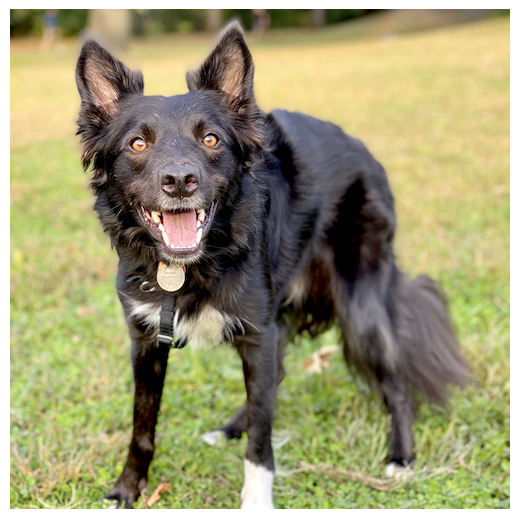

In [117]:
sns.dogplot()


AttributeError: 'DataFrame' object has no attribute 'logerror_pred_lm'

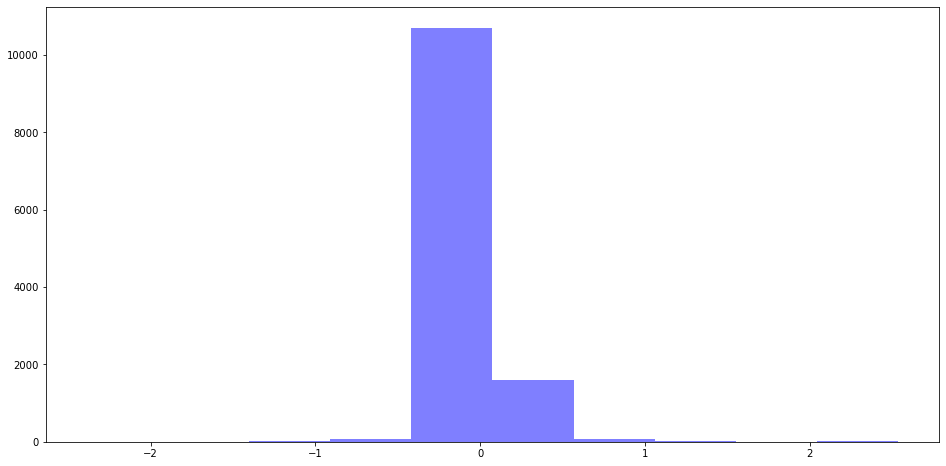

In [118]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual taxvaluedollarcnt")
plt.hist(y_validate.logerror_pred_lm, color='black', alpha=.5, label="Model: LinearRegression")
#plt.hist(y_validate.tax_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.logerror_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.hist(y_validate.logerror_pred_lars, color='orange', alpha=.5, label="lassoLars")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

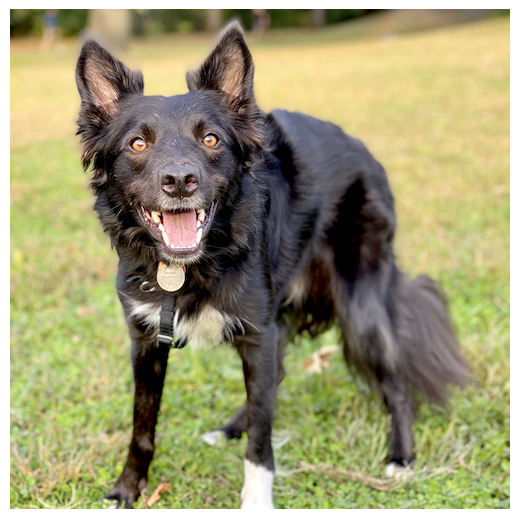